<a href="https://colab.research.google.com/github/pdan101/cs4756_robot_learning/blob/main/assignments/HW0/Copy_of_CS_4756_Assignment_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction**

Welcome to Assignment 0 of 4756. In this short notebook, we hope to refresh your memory with pytorch and probability. Please read through the following paragraphs carefully, as they will apply to this and all future assignments.

**Evaluation:**
Your code will be tested for correctness, and for certain assignments, speed. Please remember that all assignments should be completed individually.

**Academic Integrity:** We will be checking your code against other submissions in the class for logical redundancy. If you copy someone else’s code and submit it with minor changes, we will know. These cheat detectors are quite hard to fool, so please don’t try. We trust you all to submit your own work only; please don’t let us down. If you do, we will pursue the strongest consequences available to us.

**Getting Help:** The [#resources](https://www.cs.cornell.edu/courses/cs4756/2023sp/#resources) section on the course website is your friend (especially for this first assignment)! If you ever feel stuck in these projects, please feel free to avail yourself to office hours and Edstem! If you are unable to make any of the office hours listed, please let TAs know and we will be happy to assist. Since this is the first iteration of this course, please do not hesitate to reach out to TAs if you find any errors in the assignments. 


### Q1: Pytorch

This first question will hopefully refresh your memory of Pytorch and give you a general idea of what coding assignments will look like in this class. Of course, Numpy and Python skills will also be implicitly tested via this assignment. If you need a refresher, please see this [60 minute blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) for Pytorch! For Numpy, please see the quickstart [here](https://numpy.org/doc/stable/user/quickstart.html) and full API [here](https://numpy.org/doc/stable/reference/). 

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(123)
torch.manual_seed(123)

In this question, we are testing your ability to solve a simple regression problem. We will generate some train and test data, and you task will be to write the forward() function, setup the loss(), and optimize it. Please find the sections you need to fill out marked out below by *TODO*.

In [ ]:
# Generate train/test data
data_size = 500
X = np.random.rand(data_size, 1)
Y = -4 * X + 2 + np.random.randn(data_size, 1)

test_split = int(data_size * 0.8)
x_train, x_test = X[:test_split], X[test_split:]
y_train, y_test = Y[:test_split], Y[test_split:]

x_train, y_train = torch.tensor(x_train).float(), torch.tensor(y_train).float()
x_test, y_test = torch.tensor(x_test).float(), torch.tensor(y_test).float()

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self, input_dim=1, output_dim=1):
    super().__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    # TODO: please fill out the forward() function
    return self.linear(x)

In [ ]:
model = LinearRegression()

# TODO: please fill out loss_fn and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

In [ ]:
num_epochs = 1000
for epoch in range(num_epochs):
  # TODO: please create a training loop for your model
  optimizer.zero_grad()
  preds = model(x_train)
  loss = loss_fn(preds, y_train)
  loss.backward()
  optimizer.step()


Below we provide a short script to visualize the performance of your model on the training data.

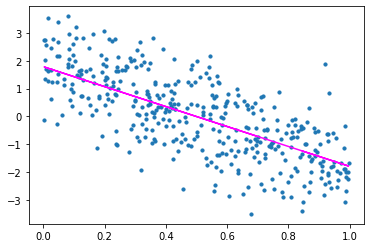

In [ ]:
# Plot training performance 
plt.scatter(x_train, y_train, s=10)
with torch.no_grad():
  y_pred = model(x_train)
y_pred = y_pred.numpy()
plt.plot(x_train, y_pred, color='magenta')
plt.show()

In [ ]:
# Test the model
with torch.no_grad():
  y_pred = model(x_test)
  test_loss = loss_fn(y_pred, y_test)
  print(f"Test loss: {test_loss.item()}")

Test loss: 0.9285014271736145


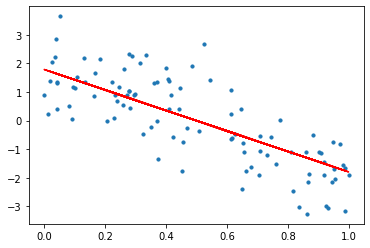

In [ ]:
# Plot test performance 
plt.scatter(x_test, y_test, s=10)
with torch.no_grad():
  y_pred = model(x_test)
y_pred = y_pred.numpy()
plt.plot(x_test, y_pred, color='red')
plt.show()